In [58]:
import pandas as pd
import datetime
import sqlite3

In [232]:
print("Baixando os dados mais atuais...")
df = pd.read_csv("https://data.brasil.io/dataset/covid19/caso.csv.gz")
df.head()

Baixando os dados mais atuais...


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-05,TO,NaN,state,17,0.0,17,True,1572866.0,17.0,1.08083,NaN
1,2020-04-04,TO,NaN,state,16,0.0,16,False,1572866.0,17.0,1.01725,NaN
2,2020-04-03,TO,NaN,state,13,0.0,15,False,1572866.0,17.0,0.82652,NaN
3,2020-04-02,TO,NaN,state,12,0.0,14,False,1572866.0,17.0,0.76294,NaN
4,2020-04-01,TO,NaN,state,12,0.0,13,False,1572866.0,17.0,0.76294,NaN


In [233]:
print("Formatando os dados...")
df.drop(["city_ibge_code", "order_for_place"], axis=1, inplace=True)
df.date = pd.to_datetime(df.date, format="%Y-%m-%d")

Formatando os dados...


In [228]:
df.dropna(subset=["death_rate"])[(df.is_last == True) & (df.place_type == "state")].sort_values("death_rate", ascending=False)

/home/weverton/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,confirmed_per_100k_inhabitants,death_rate
3351,2020-04-05,PI,NaN,state,24,4.0,True,3273227.0,0.73322,0.1667
3792,2020-04-05,PB,NaN,state,35,4.0,True,4018127.0,0.87105,0.1143
3888,2020-04-05,PE,NaN,state,201,21.0,True,9557071.0,2.10315,0.1045
152,2020-04-04,SE,NaN,state,32,3.0,True,2298696.0,1.39209,0.0938
6272,2020-04-05,AL,NaN,state,28,2.0,True,3337357.0,0.83899,0.0714
47,2020-04-05,RO,NaN,state,14,1.0,True,1777225.0,0.78774,0.0714
205,2020-04-05,SP,NaN,state,4620,275.0,True,45919049.0,10.06118,0.0595
3403,2020-04-05,RJ,NaN,state,1394,64.0,True,17264943.0,8.07417,0.0459
5680,2020-04-05,AM,NaN,state,417,15.0,True,4144597.0,10.06129,0.0360
6347,2020-04-05,AP,NaN,state,32,1.0,True,845731.0,3.78371,0.0312


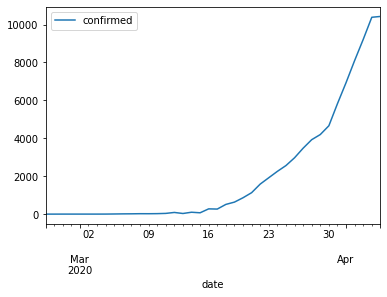

In [229]:
df[(df.place_type == "state")].groupby("date").agg(sum).plot(y=["confirmed"])

In [237]:
file = 'covid_19_brasil.db'
print(f"Salvando dados no arquivo {file}...")
# Create your connection.
cnx = sqlite3.connect(file)
# engine = create_engine('covid_19_al.db', echo=False)
df.to_sql(name='Brasil.io', con=cnx, if_exists="replace")
print("Pronto!")

Salvando dados no arquivo covid_19_brasil.db...
Pronto!


In [241]:
df = pd.read_csv("https://mobileapps.saude.gov.br/esus-vepi/files/unAFkcaNDeXajurGB7LChj8SgQYS2ptm/5184b87a0ece0117c33665b994c33ace_Download_COVID19_20200405..csv", sep=";")
df

,regiao,estadi,date,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,30/01/2020,0,0,0,0
1,Norte,RO,31/01/2020,0,0,0,0
2,Norte,RO,01/02/2020,0,0,0,0
3,Norte,RO,02/02/2020,0,0,0,0
4,Norte,RO,03/02/2020,0,0,0,0
...,...,...,...,...,...,...,...
1804,Centro-Oeste,DF,01/04/2020,23,355,0,3
1805,Centro-Oeste,DF,02/04/2020,15,370,1,4
1806,Centro-Oeste,DF,03/04/2020,32,402,1,5
1807,Centro-Oeste,DF,04/04/2020,52,454,2,7


In [242]:
df.date = pd.to_datetime(df.date, format="%d/%m/%Y")

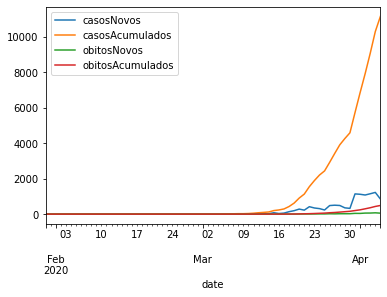

In [243]:
df.groupby("date").agg(sum).plot()

In [244]:
# Create your connection.
cnx = sqlite3.connect('covid_19_brasil.db')
# engine = create_engine('covid_19_al.db', echo=False)
df.to_sql(name="Ministério da Saúde (saude.gov.br)", con=cnx, if_exists="replace")